# Fractales

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Conjunto de Maldelbroth

In [2]:
def mandelbrot(c, maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 2:
            return float(n)  # siempre devuelve un flotante
        z = z*z + c
    return 0.0  # devuelve 0.0 en lugar de 0 para asegurarse de que sea un flotante

In [3]:
# definir los límites del gráfico
x_min, x_max, y_min, y_max = -2, 1, -1.5, 1.5

# generar la cuadrícula de puntos en el plano complejo
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
c = xx + yy*1j

# calcular si cada punto pertenece al conjunto de Mandelbrot
mandelbrot_set = np.frompyfunc(mandelbrot, 2, 1)(c, 100).astype(np.float)

C:\Users\mated\AppData\Local\Temp\ipykernel_17552\2060382063.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mandelbrot_set = np.frompyfunc(mandelbrot, 2, 1)(c, 100).astype(np.float)


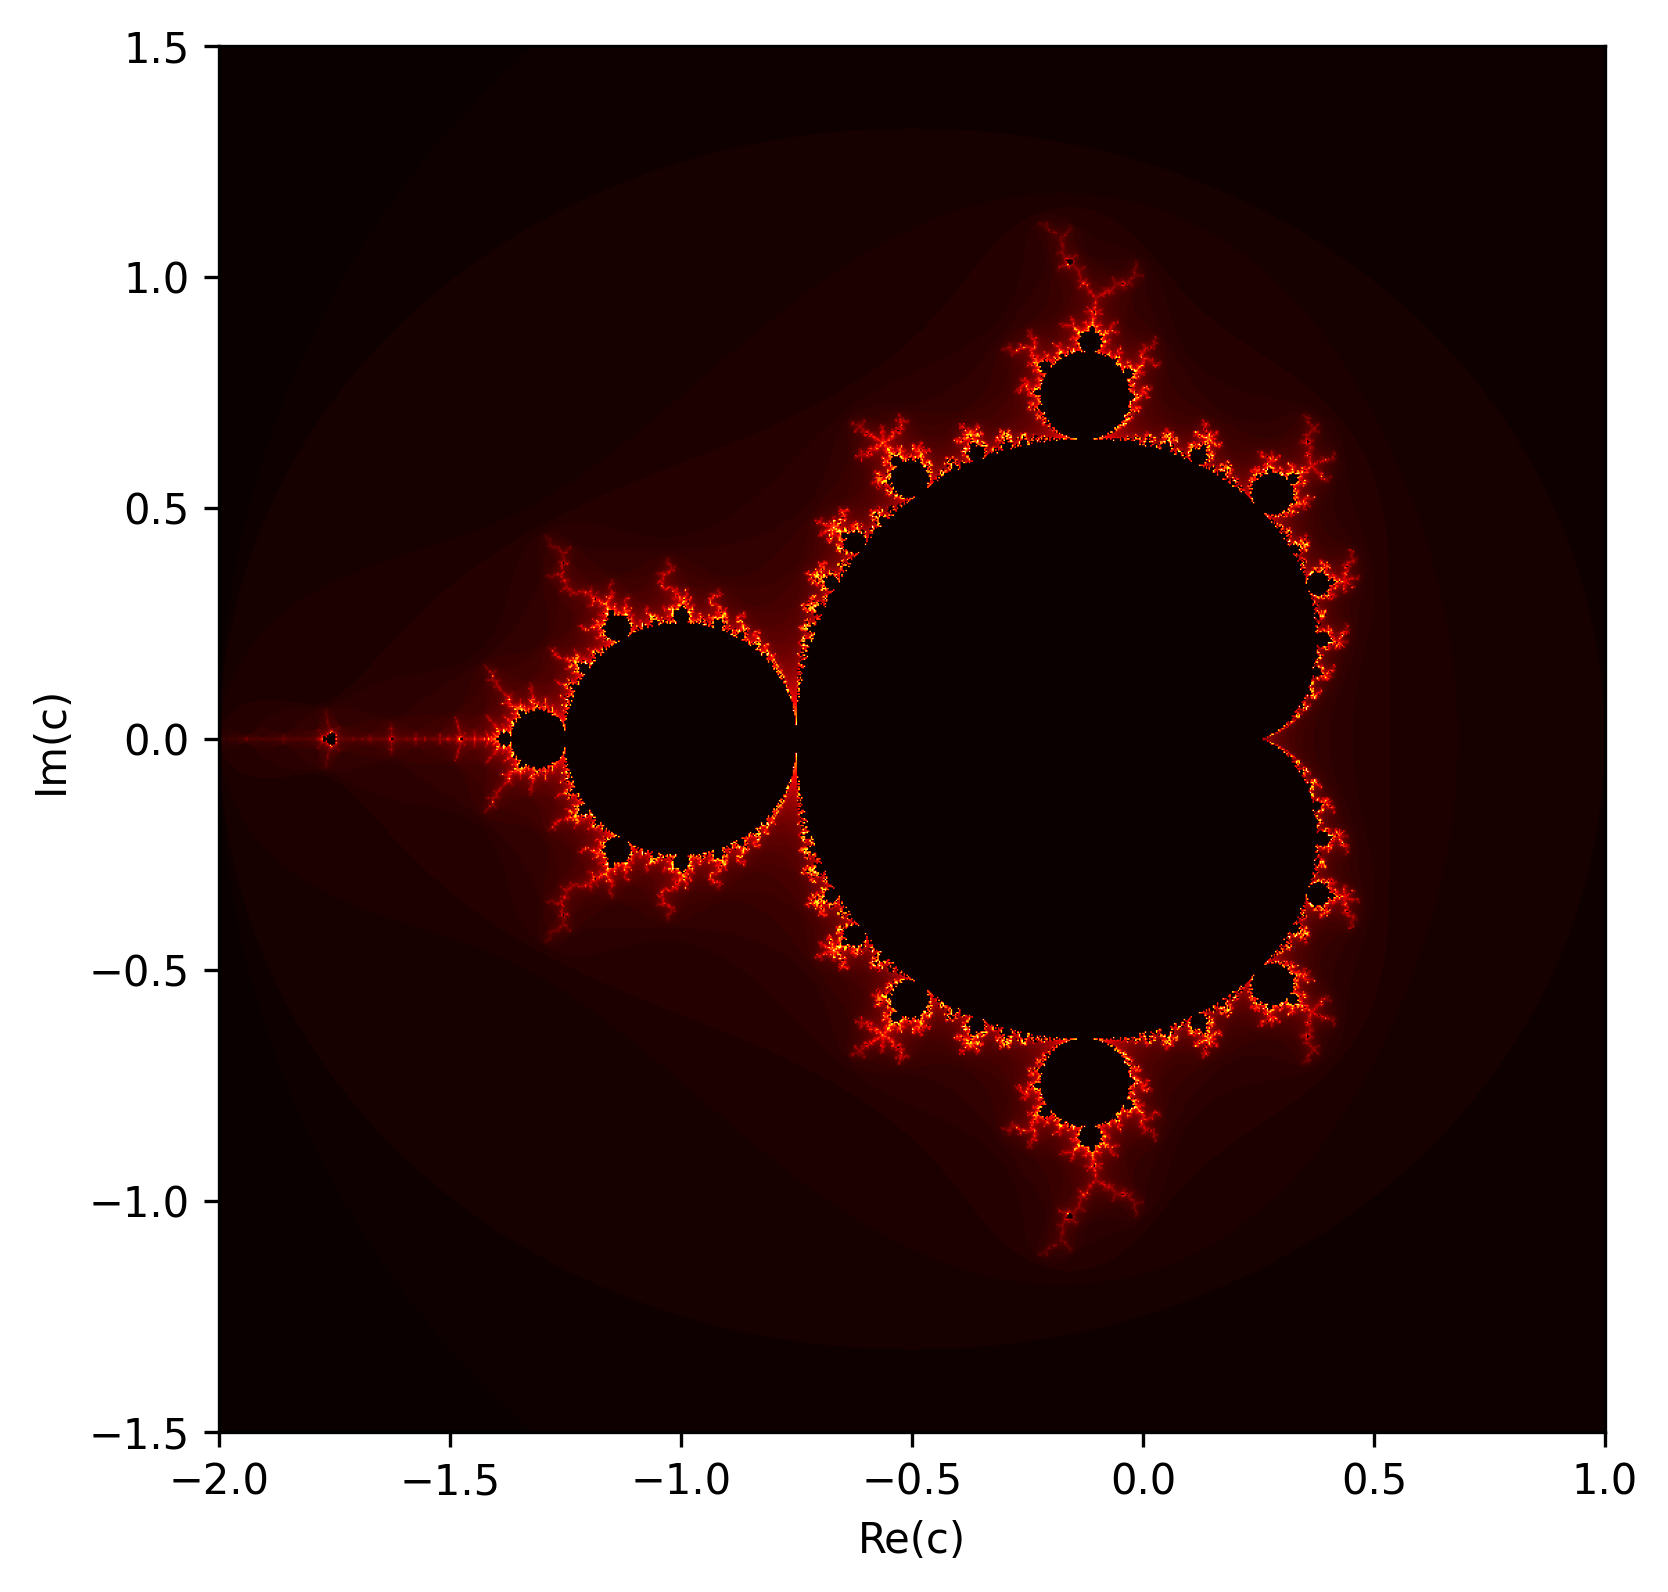

In [4]:
# graficar el conjunto de Mandelbrot
plt.figure(figsize=(6, 6), dpi=300)
plt.imshow(mandelbrot_set, cmap='hot', extent=(x_min, x_max, y_min, y_max))
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.show()

## Conjunto  de Julia

In [21]:
def julia_set(c, maxiter):
    def f(z):
        return z*z*z + c
    z = 0
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = f(z)
    return 0

In [22]:
x_min, x_max, y_min, y_max = -2, 2, -2, 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
c = -0.7 + 0.27015j
julia_set = np.frompyfunc(lambda x, y: julia_set(complex(x, y), 100), 2, 1)(xx, yy).astype(np.float)

C:\Users\mated\AppData\Local\Temp\ipykernel_17552\3422254204.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  julia_set = np.frompyfunc(lambda x, y: julia_set(complex(x, y), 100), 2, 1)(xx, yy).astype(np.float)


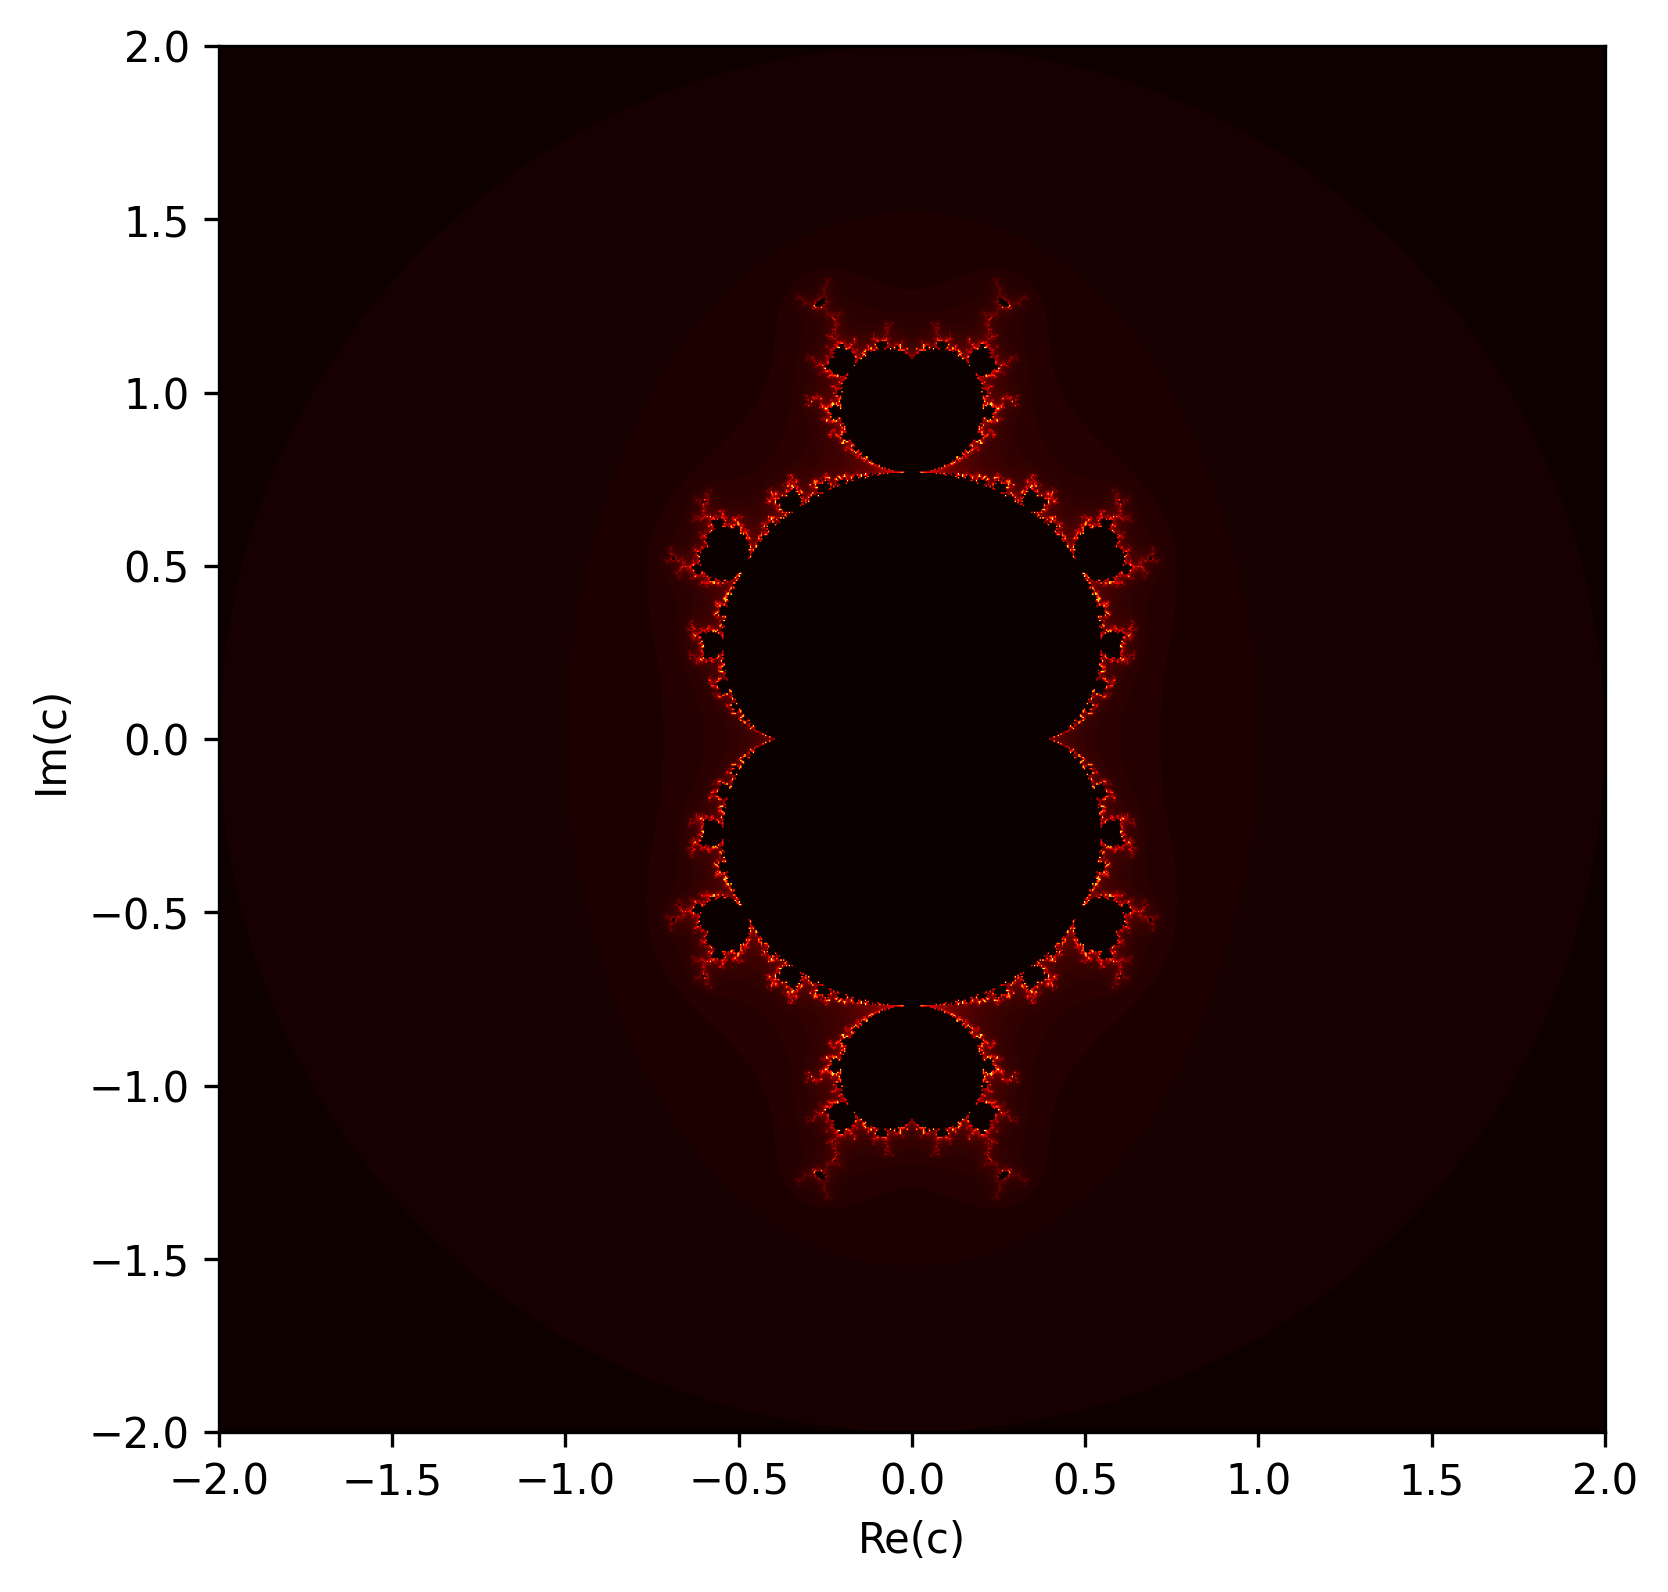

In [23]:
plt.figure(figsize=(6, 6), dpi=300)
plt.imshow(julia_set, cmap='hot', extent=(x_min, x_max, y_min, y_max))
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.show()

## Triángulo de Sierpinski

In [8]:
def sierpinski(n):
    if n == 0:
        return np.array([[1]])
    else:
        lower = sierpinski(n-1)
        upper = np.zeros((lower.shape[0], lower.shape[1]*2), dtype=np.bool)
        upper[:, ::2] = lower
        upper[:, 1::2] = lower
        return np.concatenate((upper, upper ^ True), axis=0)

In [9]:
sierpinski_array = sierpinski(5)

C:\Users\mated\AppData\Local\Temp\ipykernel_17552\642287569.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = np.zeros((lower.shape[0], lower.shape[1]*2), dtype=np.bool)


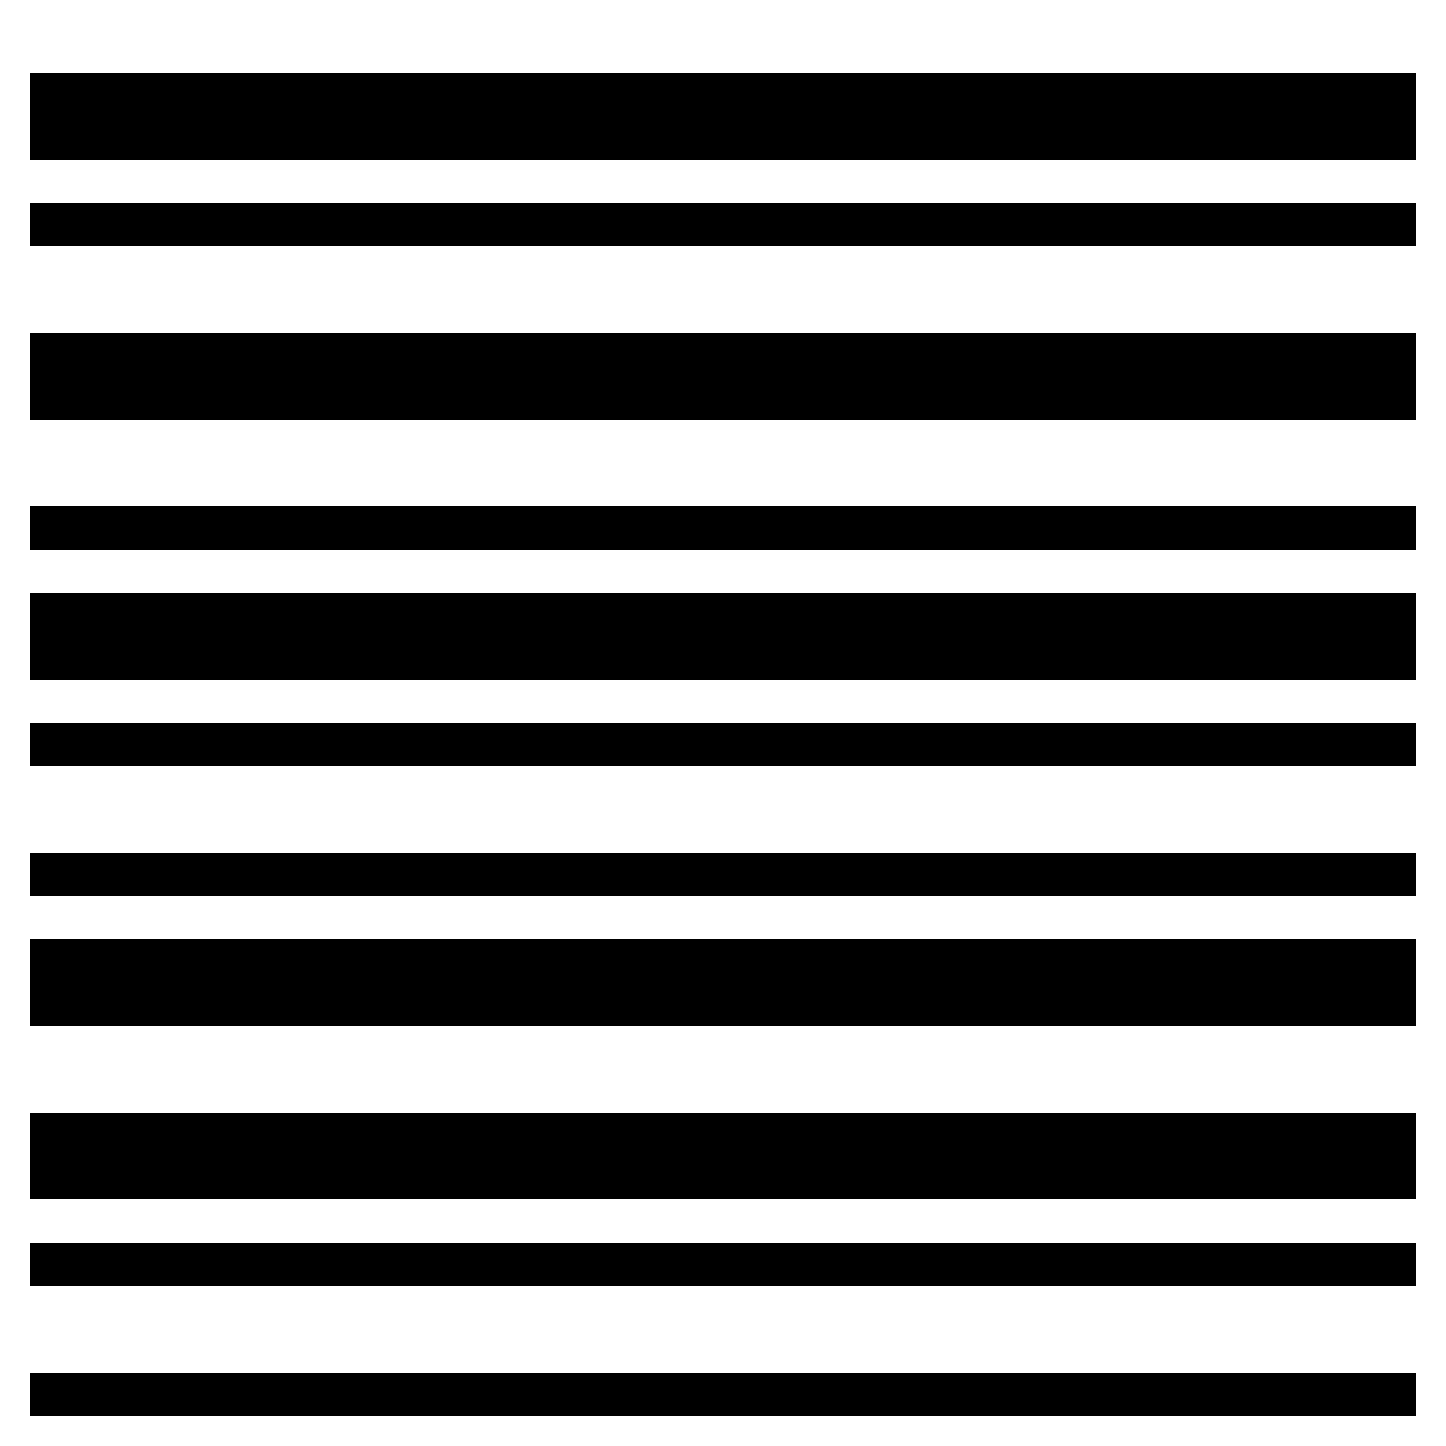

In [10]:
plt.figure(figsize=(6, 6), dpi=300)
plt.imshow(sierpinski_array, cmap='gray')
plt.axis('off')
plt.show()

## Curva de Koch

In [11]:
def koch_curve(n):
    if n == 0:
        return np.array([[0, 0], [1, 0]])
    else:
        lower = koch_curve(n-1)
        segments = []
        for i in range(lower.shape[0]-1):
            a, b = lower[i], lower[i+1]
            v = (b - a) / 3
            c = a + v
            d = b - v
            h = v @ np.array([[0, -1], [1, 0]])  # giro 90 grados
            e = c + h
            f = d + h
            segments += [a, e, c, f, d]
        segments.append(lower[-1])
        return np.array(segments)

In [12]:
koch_array = koch_curve(7)

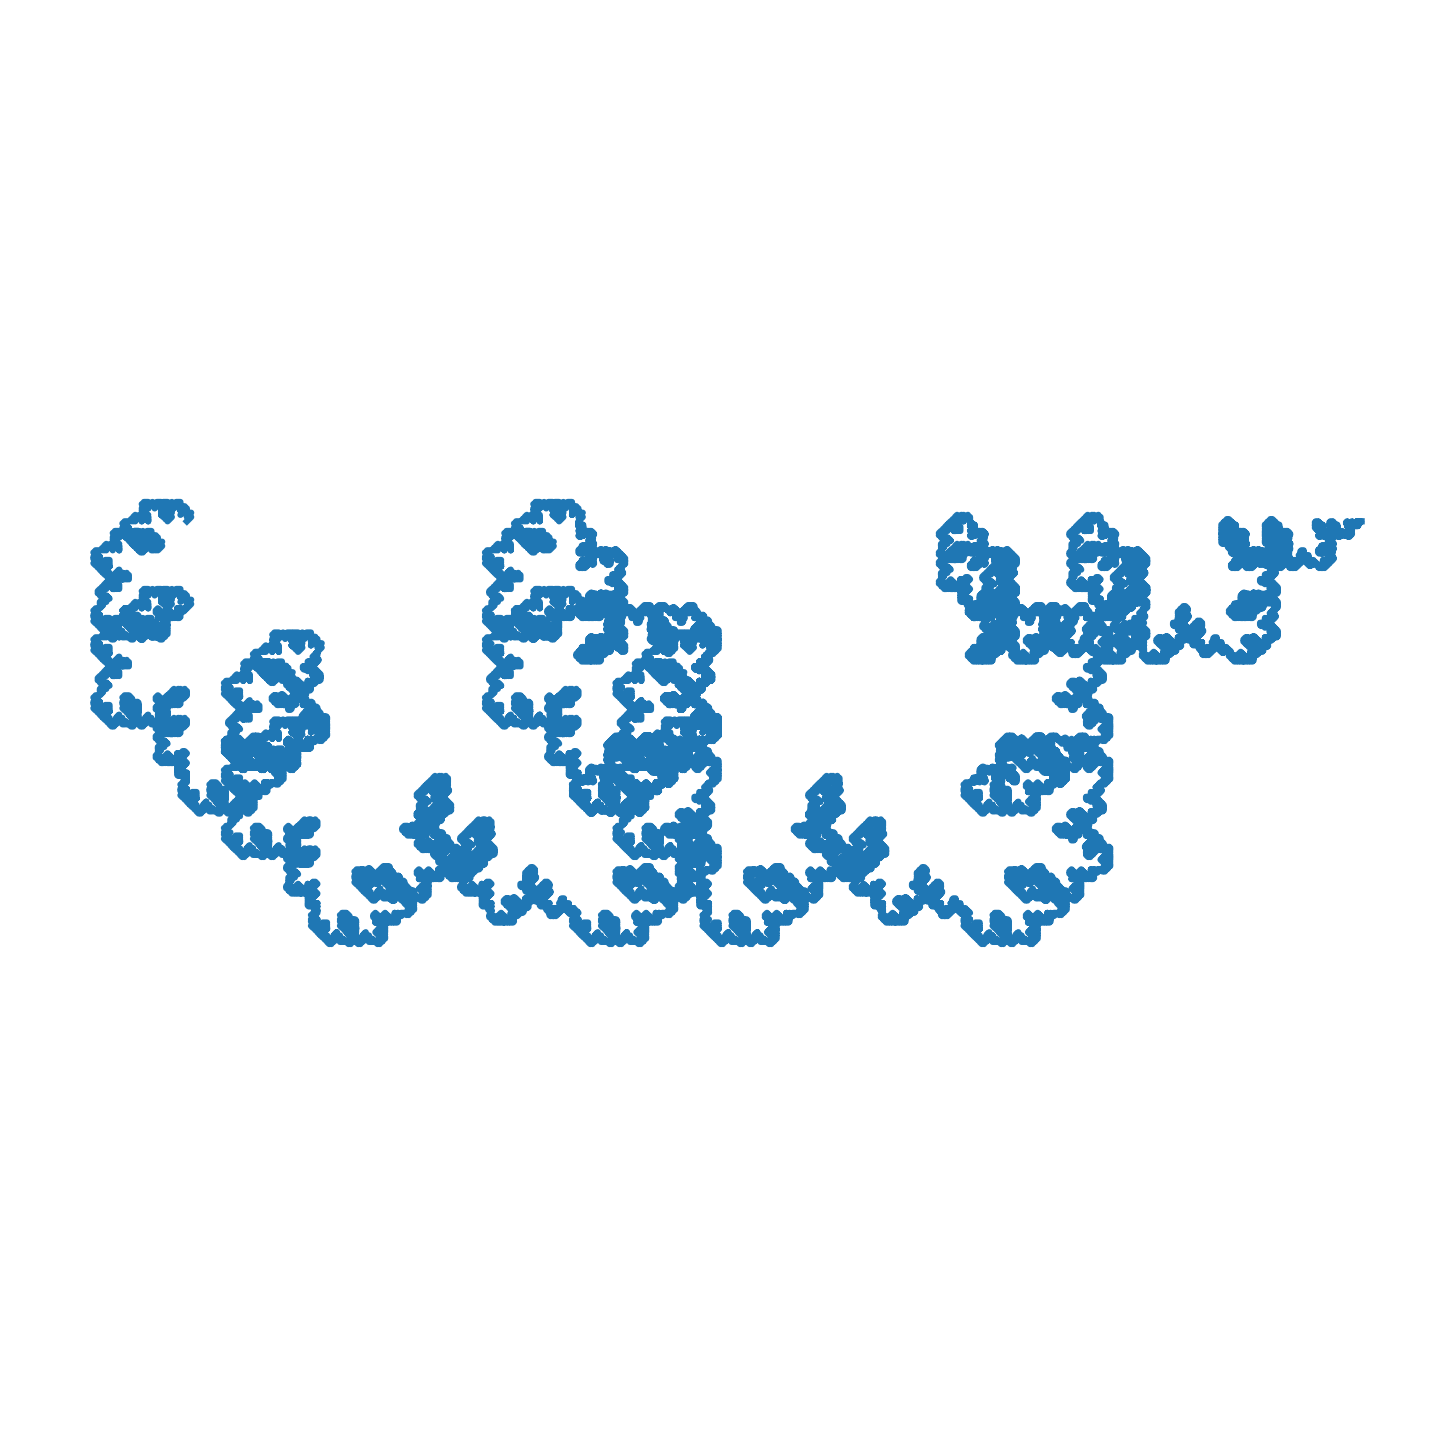

In [13]:
plt.figure(figsize=(6, 6), dpi=300)
plt.plot(koch_array[:, 0], koch_array[:, 1])
plt.axis('equal')
plt.axis('off')
plt.show()

## Conjunto de Newton

In [14]:
def newton_set(f, f_prime, roots, maxiter):
    def find_root(z):
        for i in range(len(roots)):
            if abs(z - roots[i]) < 1e-3:
                return i
        return -1
    
    x_min, x_max, y_min, y_max = -1.5, 1.5, -1.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
    z = xx + 1j*yy
    for n in range(maxiter):
        z -= f(z) / f_prime(z)
        root_indices = np.frompyfunc(find_root, 1, 1)(z).astype(np.float)
        if n == 0:
            newton_set = root_indices
        else:
            newton_set[root_indices != -1] = root_indices[root_indices != -1]
    
    plt.figure(figsize=(6, 6), dpi=300)
    plt.imshow(newton_set, cmap='jet', extent=(x_min, x_max, y_min, y_max))
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.show()

In [15]:
def f(z):
    return z**3 - 1

In [16]:
def f_prime(z):
    return 3*z**2

C:\Users\mated\AppData\Local\Temp\ipykernel_17552\3317841153.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  root_indices = np.frompyfunc(find_root, 1, 1)(z).astype(np.float)


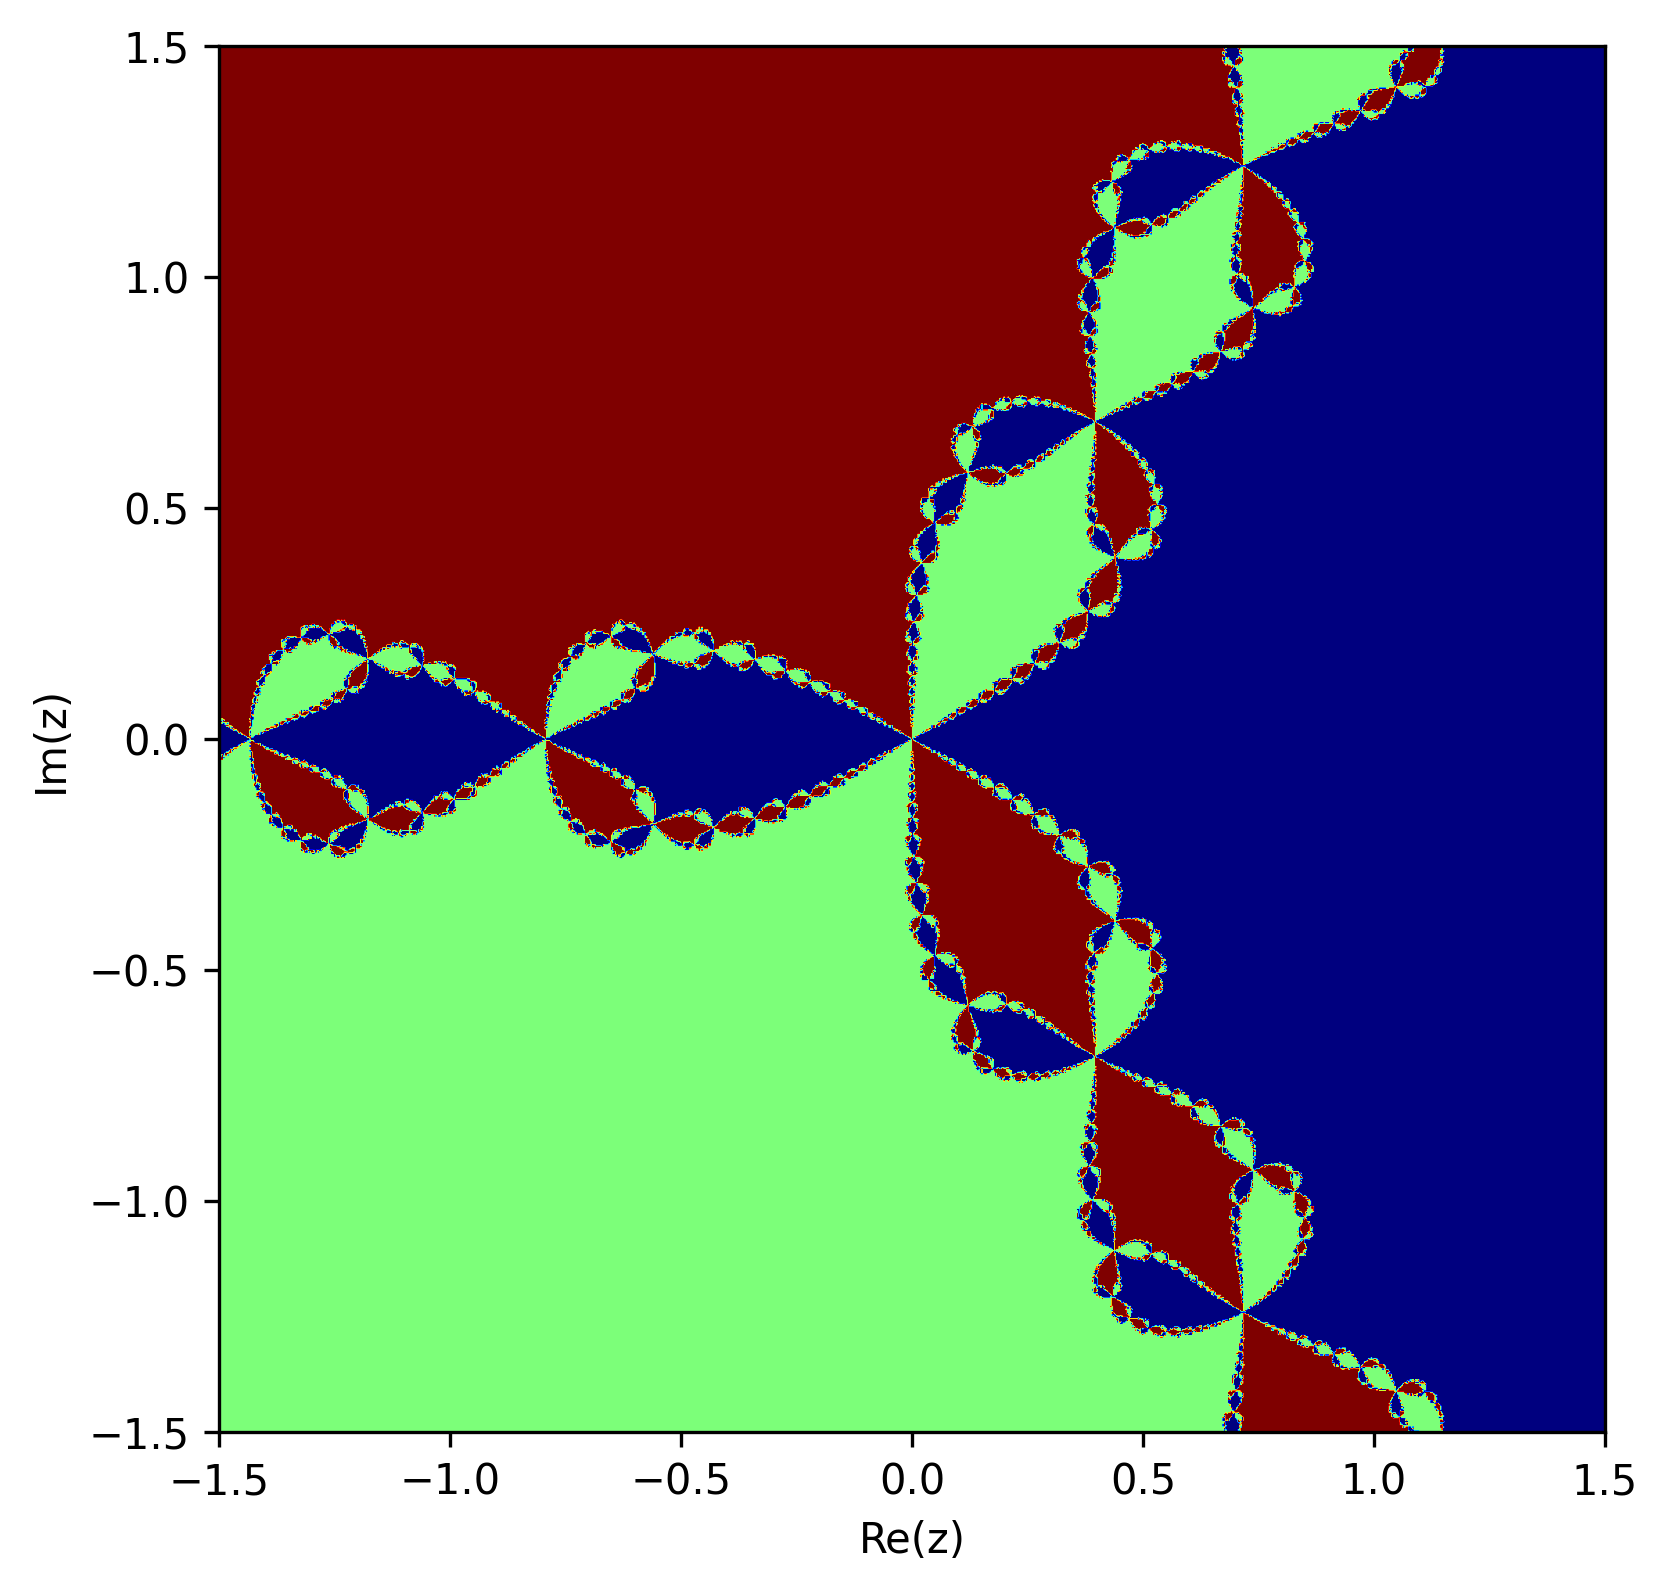

In [17]:
roots = [np.exp(2j*np.pi*i/3) for i in range(3)]
newton_set(f, f_prime, roots, 50)

## Conjunto de Hilbert

In [18]:
def hilbert_curve(n):
    if n == 0:
        return np.array([[0, 0]])
    else:
        lower = hilbert_curve(n-1)
        segments = np.zeros((lower.shape[0]*4 - 3, 2))
        segments[0] = lower[0]
        segments[-1] = lower[-1]
        for i in range(lower.shape[0]-1):
            a, b = lower[i], lower[i+1]
            v = (b - a) / 2
            c = a + v
            d = b - v
            h = v @ np.array([[0, 1], [-1, 0]])  # giro -90 grados
            e = c + h
            f = d + h
            segments[i*4+1] = a
            segments[i*4+2] = e
            segments[i*4+3] = f
            segments[i*4+4] = d
        return segments

In [19]:
hilbert_array = hilbert_curve(1)

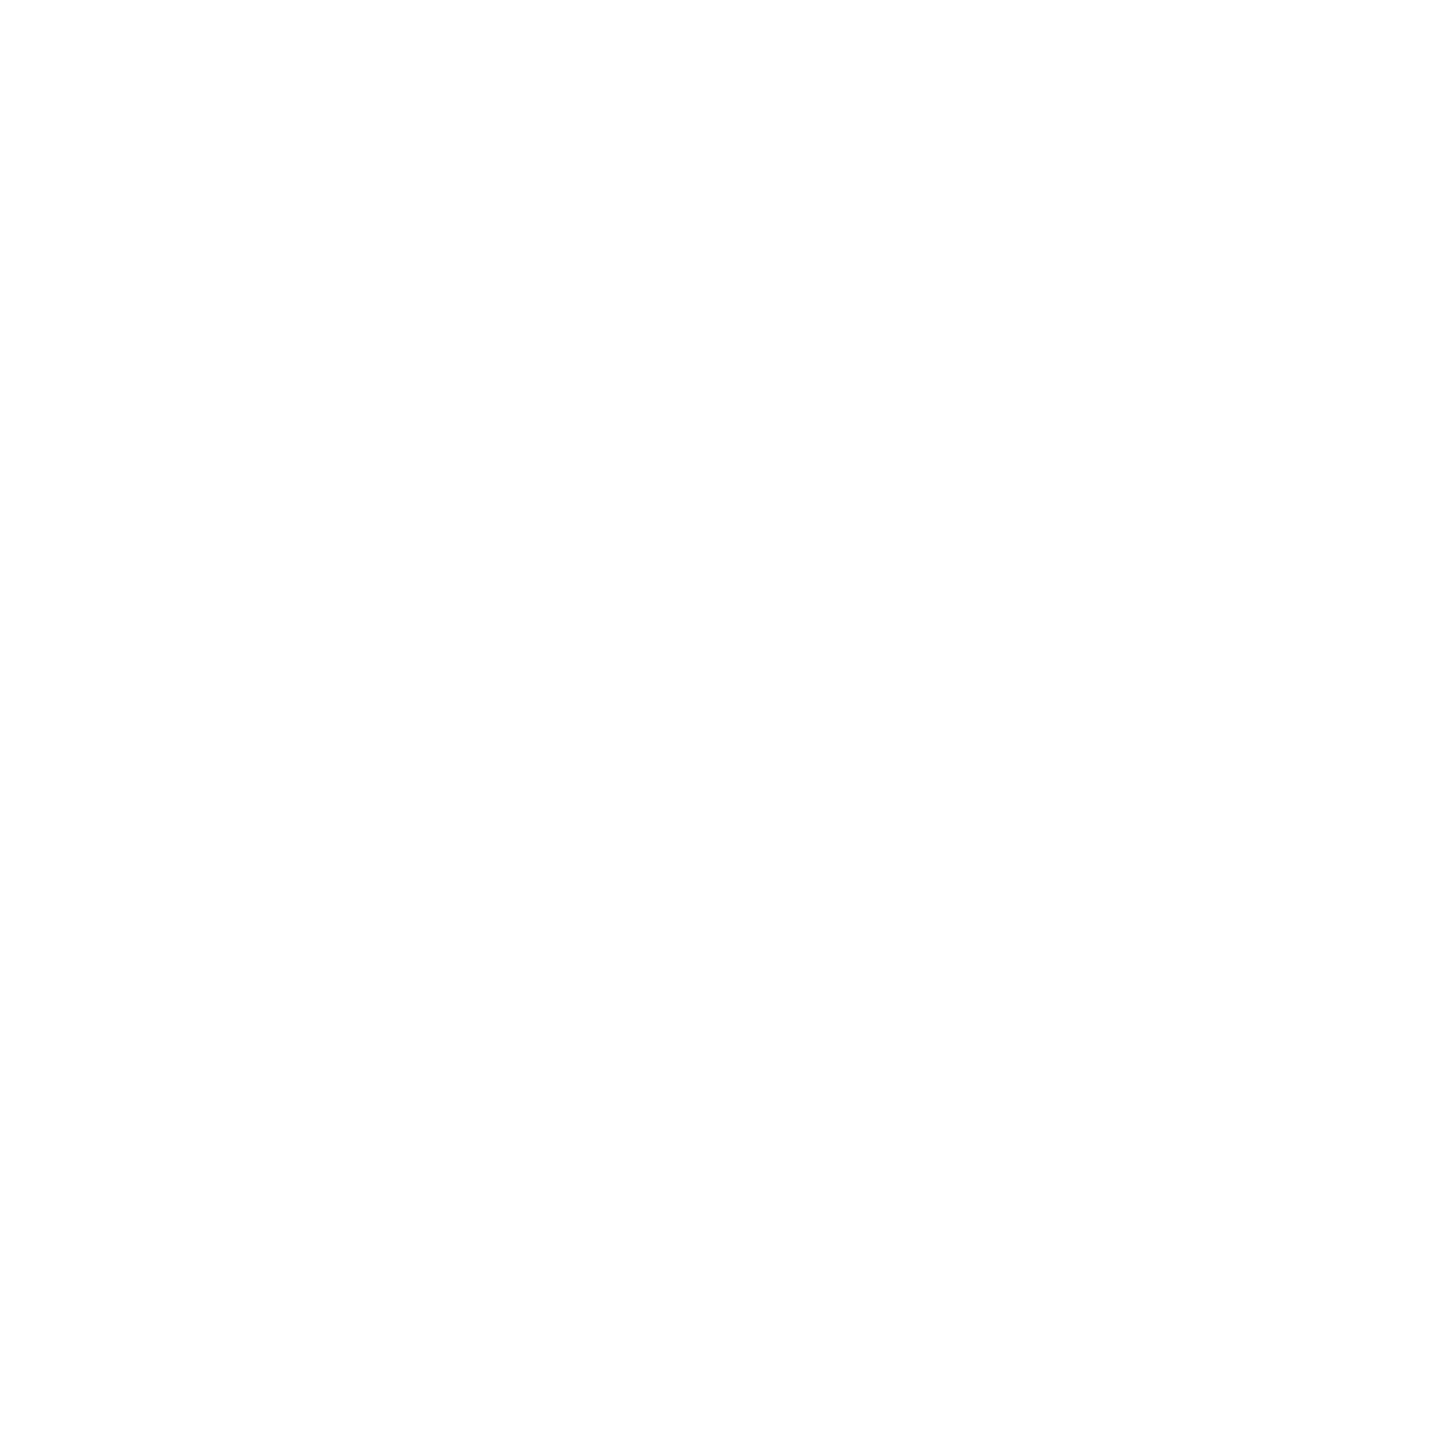

In [20]:
plt.figure(figsize=(6, 6), dpi=300)
plt.plot(hilbert_array[:, 0], hilbert_array[:, 1])
plt.axis('equal')
plt.axis('off')
plt.show()